In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x= df.iloc[:,3:]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## K-means cluster

In [5]:
from sklearn.cluster import KMeans

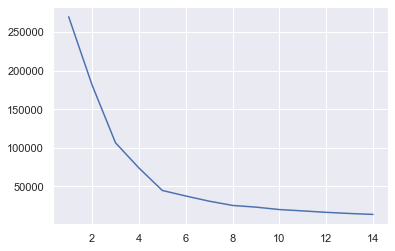

In [6]:
#To find best k value use Elbow method

wcss= []

for i in range(1,15):
    kmeans= KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss)

Best k value is 5.

In [7]:
kmeans= KMeans(n_clusters=5, init= 'k-means++')
y_kmeans= kmeans.fit_predict(x)
y_kmeans

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [8]:
combine= pd.concat([df, pd.DataFrame(y_kmeans)], axis=1)
combine.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


In [9]:
combine.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2
199,200,Male,30,137,83,3


In [10]:
x= x.values

Text(0, 0.5, 'Spending Score')

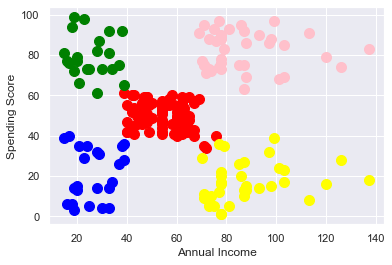

In [11]:
# Visualize clusters

plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label='Cluster_0')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label='Cluster_1')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='yellow', label='Cluster_2')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='pink', label='Cluster_3')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='green', label='Cluster_4')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

Target cluster is yellow one.

In [12]:
combine.to_csv('New_cluster_data.csv')

## Hierarchical cluster

In [13]:
import scipy.cluster.hierarchy as such

In [14]:
#dendogram= such.dendrogram(such.linkage(x,method='ward')

## Agglomerative clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [17]:
hc

AgglomerativeClustering(n_clusters=5)

In [18]:
y_hc= hc.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [19]:
combine_2= pd.concat([df, pd.DataFrame(y_hc)], axis=1)
combine_2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


Text(0, 0.5, 'Spending Score')

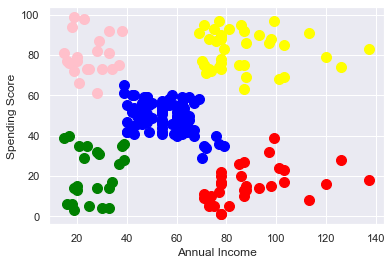

In [20]:
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=100, c='red', label='Cluster_0')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=100, c='blue', label='Cluster_1')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=100, c='yellow', label='Cluster_2')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], s=100, c='pink', label='Cluster_3')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], s=100, c='green', label='Cluster_4')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

## Market Basket Analysis or Association rule mining

In [21]:
mydata= pd.read_csv('Market_Basket_Optimisation.csv', header= None)
mydata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


Read above file as 1 product purchased by 7501 customers. 2 products purchased by 5747 customers etc.

In [23]:
mydata.shape

(7501, 20)

In [24]:
# convert data into transaction form

transaction= []
for i in range(0, 7501):
    transaction.append([str(mydata.values[i,j]) for j in range(0,20)])
    
print(transaction)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan

In [25]:
# Build Association rule mining (Data mining)
!pip install apyori

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=bafa069c60457ec5162a45bdba7fc681ad3503ec4eb294e3bcb5768dbeedf85e
  Stored in directory: c:\users\dell 2\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [27]:
from apyori import apriori

In [37]:
rules= apriori(transaction, min_support= 0.01, min_confidence= 0.3, 
               min_lift=2, max_length= 2)

In [38]:
rules

<generator object apriori at 0x000002074F6F8DD0>

In [39]:
list(rules)

[RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]),
 RelationRecord(items=frozenset({'ground beef', 'spaghetti'}), support=0.03919477403012932, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'spaghetti'}), confidence=0.3989145183175034, lift=2.291162176033379)]),
 RelationRecord(items=frozenset({'soup', 'milk'}), support=0.015197973603519531, ordered_statistics=[OrderedStatistic(items_base=frozenset({'soup'}), items_add=frozenset({'milk'}), confidence=0.3007915567282322, lift=2.3212319619531585)]),
 RelationRecord(items=frozenset({'spaghetti', 'red wine'}), support=0.010265297960271964, ordered_statistics=[OrderedStatistic(items_base=frozenset({'red wine'}), items_add=frozenset({'spaghetti'}), confidence=0.36492890995260